# NLTK: gender analysis

In [1]:
# On Jupyter - run this cell
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from urllib.request import urlopen 

In [ ]:
# on Colab -- run this cell
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from urllib.request import urlopen 

## selecting and cleaning our text

In [2]:
def clean(url):
    # loads and tokenizes the text
    open_url = urlopen(url)
    read_text = open_url.read()
    decoded_text = read_text.decode()
    tokens = nltk.word_tokenize(decoded_text)
    
    # cleans the text
    stops = stopwords.words('english')
    text = [] 
    for word in tokens:
        if word.isalpha(): 
            if word not in stops:
                text.append(word.lower())     
    
    return text

In [3]:
# books by women
frankenstein = 'https://www.gutenberg.org/cache/epub/84/pg84.txt'
little_women = 'https://www.gutenberg.org/cache/epub/37106/pg37106.txt'
pride_prejudice = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
orlando = 'http://gutenberg.net.au/ebooks02/0200331.txt'

# books by men
dracula = 'https://www.gutenberg.org/cache/epub/345/pg345.txt'
dorian_gray = 'https://www.gutenberg.org/cache/epub/174/pg174.txt'
crime_punishment = 'https://www.gutenberg.org/files/2554/2554-0.txt'
heart_darkness = 'https://www.gutenberg.org/files/219/219-0.txt'

In [ ]:
# running the "clean" function on the text "orlando"

orl = clean(orlando)

In [4]:
frank = clean(frankenstein)

In [5]:
print(frank)

['project', 'gutenberg', 'ebook', 'frankenstein', 'mary', 'wollstonecraft', 'shelley', 'this', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'if', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'frankenstein', 'the', 'modern', 'prometheus', 'author', 'mary', 'wollstonecraft', 'shelley', 'release', 'date', 'october', 'ebook', 'most', 'recently', 'updated', 'december', 'language', 'english', 'produced', 'judith', 'boss', 'christy', 'phillips', 'lynn', 'hanninen', 'david', 'meltzer', 'html', 'version', 'al', 'haines', 'further', 'corrections', 'menno', 'de', 'leeuw', 'start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'frankenstein', 'frankenstein', 'modern', 'prometheus', 'mary', 'wollstonecraft', 'godwin', 'shelley', 'contents', 'letter', 'letter'

## NLTK methods for text analysis

In [6]:
# turn our saved text (list of strings) to an NLTK object for 
# text analysis

frank = nltk.Text(frank)

In [7]:
# checks the most common words

frank.vocab().most_common(20)

[('i', 2839),
 ('the', 302),
 ('one', 204),
 ('could', 197),
 ('would', 183),
 ('yet', 152),
 ('my', 141),
 ('but', 139),
 ('man', 136),
 ('father', 133),
 ('he', 131),
 ('upon', 128),
 ('may', 114),
 ('life', 113),
 ('every', 109),
 ('first', 108),
 ('might', 108),
 ('shall', 106),
 ('eyes', 104),
 ('said', 102)]

In [8]:
# load up and clean a text by a man for comparison 

drac = clean(dracula)

In [9]:
print(drac)

['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'this', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'give', 'away', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'if', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'dracula', 'author', 'bram', 'stoker', 'release', 'date', 'october', 'ebook', 'most', 'recently', 'updated', 'march', 'language', 'english', 'produced', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'dracula', 'dracula', 'bram', 'stoker', 'illustration', 'colophon', 'new', 'york', 'grosset', 'dunlap', 'copyright', 'united', 'states', 'america', 'according', 'act', 'congress', 'bram', 'stoker', 'rights', 'printed', 'in', 'the', 'united', 'states', 'at', 'the', 'country', 'life', 'press', 'garden', 'city', 'to

In [10]:
drac = nltk.Text(drac)

drac.vocab().most_common(20)

[('i', 4839),
 ('the', 615),
 ('he', 584),
 ('said', 570),
 ('could', 508),
 ('one', 506),
 ('us', 463),
 ('must', 450),
 ('would', 447),
 ('shall', 428),
 ('may', 416),
 ('see', 397),
 ('know', 391),
 ('it', 380),
 ('time', 377),
 ('come', 339),
 ('van', 323),
 ('helsing', 317),
 ('we', 311),
 ('came', 309)]

In [11]:
# question: how does each text portray the monster characters?

drac.similar('monster')

diary i find dark spider


In [19]:
frank.similar('monster')

wretch i understand shall child but reflections night thoughts rather
know closed seen showed dæmon happy recollected slavery murderer epoch


In [13]:
drac.count("monster")

23

In [15]:
frank.count("monster")

30

In [ ]:

orlando.common_contexts(["woman"])

## group challenge

Compare and contrast one text by a woman and one text by a man. One possibility is to compare the main characters from each text. Another possibility is to compare the genders of the main characters. Or you can explore themes, or settings from the text.

After cleaning your text, use NLTK methods like: 
- `concordance()`
- `dispersion_plot([])`
- `collocations()`
- `common_contexts([])`
- most common words: `text.vocab().most_common(20)`

Try to answer the following questions:
- What words are associated with "man" and "woman" from each text?
- What are the differences between the genders?
- What are the differences in gender portrayal between the male and female authors?

Frankenstein: "man" vs "woman" 
- with `similar()`, "man" has 14 words, and "woman" has 1. 
- Means that men has more references than women text. Makes sense because it's about a male scientist creating a man. 

In [ ]:
orlando.count("woman")

In [ ]:
orlando.count("man")

In [ ]:
text = clean(dracula)

In [ ]:
dracula = nltk.Text(text)

In [ ]:
dracula.similar('woman')

## group challenge: monsters

Compare and contrast the monsters from Frankenstein and Dracula. One possibility is to compare the main characters from each text.

After cleaning your text, use NLTK methods like: 
- `concordance()`
- `dispersion_plot([])`
- `collocations()`
- `common_contexts([])`
- most common words: `text.vocab().most_common(20)`

Explore the different ways that monster is being portrayed across Dracula and Frankenstein. What words are associated with each one? Try using words like “Dracula” “Vampire” and “Murderer”, or other words that seem appropriate to your analysis

In [16]:
drac.concordance("monster")

Displaying 23 of 23 matches:
 forward shouted voice laden menace monster give child she threw knees raising 
e profanation word write connection monster asked why may i go because dear sir
 old chapel i knew well enough find monster i sought the great box place close 
terrible desire came upon rid world monster there lethal weapon hand i seized s
y glassy sea like roaring devouring monster waves beat madly level sands rushed
leave ship but i shall baffle fiend monster i shall tie hands wheel strength be
rrible things world awful thing man monster really london i fear think i moment
 led struggle us rid earth terrible monster must knowledge help get i think cyl
 men determined nay pledged destroy monster part woman even harmed heart may fa
oxes ready must either capture kill monster lair must speak sterilise earth see
 sickens think every breath exhaled monster seemed clung place intensified loat
 arthur we matters us dangers fears monster used power brute world last time so
least time 

In [17]:
frank.concordance("monster")

Displaying 25 of 30 matches:
 window shutters i beheld miserable monster i created he held curtain bed eyes 
till alive walking i dreaded behold monster i feared still henry see entreating
e room tell oh save save i imagined monster seized i struggled furiously fell f
friend could restored life the form monster i bestowed existence ever eyes i ra
ened menaced i almost began think i monster said i he threatened excommunicatio
rable evils i lived daily fear lest monster i created perpetrate new wickedness
h satiated blood remaining abhorred monster fiend thou art the tortures hell mi
 i became fully convinced i reality monster i i filled bitterest sensations des
 around i saw heard none like was i monster blot upon earth men fled men disown
med agony accursed creator why form monster hideous even turned disgust god pit
he struggled violently let go cried monster ugly wretch you wish eat tear piece
 never see father must come hideous monster let go my papa punish you dare keep
round i mus

In [ ]:
# for frankenstein, words like "miserable", "fear", "solitude" appear in context with "monster"
# for dracula, words like "destroy", "terrible", "threw", "shouted" appear in context with "monster"

# these resulst suggest that Dracula was much less sympathetic than Frankenstein. 
# we sort of pity Frankenstein, while we fear Dracula. 

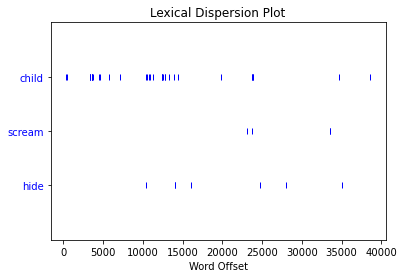

In [20]:
# dispersion plot of the words "child", "scream", and "hide"

frank.dispersion_plot(["child", "scream", "hide"])

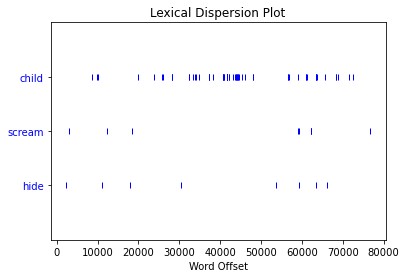

In [ ]:
# compared to frankenstein, dracula has more instances of "scream" and "hide". This suggests
# that the monster in dracula is more terrifying than the monster in frankenstein.

# the graph also shows more instances of "child" in the middle and end of the novel. Maybe there's 
# a loss of innocence "child" in frankenstein, but not in dracula. To find out, we would look at 
# the context of the word "child" across the novels.
 
drac.dispersion_plot(["child", "scream", "hide"])

In [22]:
# checking words similar to "child" in frankenstein and dracula

frank.similar('child')

shall but yet soon humanity closed sledge went replied friends
ineffectual monster virtue instructed fellowship


In [23]:
drac.similar('child')

i life dear night said it yes she duty whilst no awful need heart
believe sad owner agonising


In [24]:
# checking the context of "child" in frankenstein and dracula

drac.concordance('child')

Displaying 25 of 65 matches:
opened if ears deceive gasp low wail child the women closed round whilst i agha
uted voice laden menace monster give child she threw knees raising hands cried 
king lips i could pity i knew become child better dead what shall i i how i esc
ome home rose without word obedience child as passed along gravel hurt feet luc
 regarding remember nothing she says child used walk sleep whitby habit came ba
 you lover dear miss she bad bad nay child go like for suddenly grew pale sat c
little miss medicine drink like good child see i lift swallow easy yes she made
d you glad know lucy better the dear child still asleep i looked room saw go le
 asked professor well i anxious dear child night went room she sleeping soundly
i feared heavy odour would much dear child weak state i took away opened bit wi
i fear end watching shock great poor child rally god help us mina harker lucy u
 want make home i left neither chick child gone i left everything i cried lucy 
ffer agreed

In [25]:
frank.concordance('child')

Displaying 25 of 35 matches:
induce commence laborious voyage joy child feels embarks little boat holiday ma
 familiarity increased regret i felt child learning father dying injunction for
taly visited germany france i eldest child born naples infant accompanied rambl
ied rambles i remained several years child much attached seemed draw inexhausti
llections i plaything idol something child innocent helpless creature bestowed 
he four others hardy little vagrants child thin fair her hair brightest living 
irl eagerly communicated history she child daughter milanese nobleman her mothe
urse better they long married eldest child born the father charge one italians 
stria known his property confiscated child became orphan beggar she continued f
urned milan found playing hall villa child fairer pictured creature seemed shed
r isaac newton said avowed felt like child picking shells beside great unexplor
my father scientific i left struggle child blindness added student thirst knowl
ons i come 